## Creating Figures to Analyze a System of two ODEs

In this notebook, we will look at some Python tools to create figures to help us understand a system of ODEs.  

The examples will use the system developed to model a genetic switch in *E. coli* from Gardner et al, 2000.  The system of equations is
$$ \frac{du}{dt}=\frac{\alpha}{1+v^\beta}-u $$
$$\frac{dv}{dt}= \frac{\alpha}{1+u^\beta}-v $$.

In this system, $u$ is the concentration of the first repressor, $v$ is the concentration of the second repressor, $\alpha$ is the synthesis rate of each repressor, $\beta$ is the cooperativity of repression of each promoter.  (In the orginal paper, there are different values for each repressor for $\alpha$ and $\beta$, but we have simplified the model here and have them equal.

The system captures two main behaviors:

- the cooperative repression (first term of each equation).  Notice that increasing $v$ makes $\frac{du}{dt}$ smaller, and similarly increasing $u$ makes $\frac{dv}{dt}$ smaller.
- the degradation/dilution of repressors (second term of each equation).

Note that the system is nonlinear and autonomous (no explicit dependence on time), and there are two state variables ($u$ and $v$), so we can use tools from Math 313 to understand the behavior of solutions, the classification of equilibria, and how behavior depends on parameters (e.g., bifurcations).

### First, import libraries.
Libraries are like toolboxes, and come with a lot of useful functions beyond what is in the standard built-in library in Python.
The line 
`%matplotlib inline`
tells Jupyter to embed plots inside the notebook right after the cell is executed.  (We will see how to export and save figures later in the notebook.)


In [1]:
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
import scipy.integrate # Integration library
from scipy.integrate import odeint # function to solve ODEs numerically
import matplotlib.patches as mpatches # used to write custom legends
# embedds plots in notebook
%matplotlib inline 

### Numerically solve this system for one parameter set and one initial condition
First, we will solve the system for fixed $\alpha=1$, $\beta=2$ and initial condition $u(0)=.1$, $v(0)=1$.  We will plot the solution (a function $u(t)$ and a function $v(t)$).

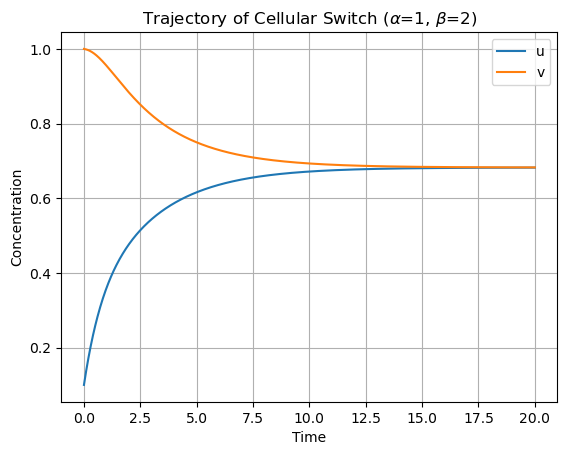

In [3]:
def cellular_switch_one(y,t):
    """ODE system modeling Gardner's bistable cellular switch with alpha = 1, beta = 2
    Args:
    y (array): (concentration of u, concentration of v)
    t (float): time
    Return: dy/dt"""
    alpha = 1
    beta = 2
    u, v = y 
    return np.array([(alpha/(1+v**beta)) - u ,
                     (alpha/(1+u**beta)) - v])

# Initial condition and time span
initial_condition = (0.1, 1)
time = np.linspace(0, 20, 1000)

# Solve the ODE
# form is scipy.integrate.odeint(func, y0, t, args=(), ...) 
# where func defines the RHS of the system of ODEs, y0 is initial condition
# t is array of time points where solution is computed
# args optional tuple
solution = scipy.integrate.odeint(cellular_switch_one, y0=initial_condition, t=time)

# Plot the results
plt.plot(time, solution[:, 0], label='u')
plt.plot(time, solution[:, 1], label='v')
plt.xlabel('Time')
plt.ylabel('Concentration')
# the r makes strings raw so I can use LaTex math mode to write alpha, beta in greek
plt.title(r'Trajectory of Cellular Switch ($\alpha$=1, $\beta$=2)')
plt.legend()
plt.grid(True)
# save as a pdf if you need the image file for Overleaf, etc.
plt.savefig("Gardner.pdf")
# see plot in notebook
plt.show()

### Loop through different initial conditions and separate the graphs of $u$ and $v$
From the graph above, it looks like $u$ and $v$ both asymptotically approach the same value.  We might be interested in playing with initial conditions to see if there is more than one stable equilibrium.  It can be visually overwhelming to have many curves for both $u$ and $v$ on one set of axes, so we can also separate them out into distinct plots.  We will try the initial condtions $(.1,1)$, $(2,2)$, $(1,1.3)$, $(2,3)$, $(2,1)$, $(1,2)$.

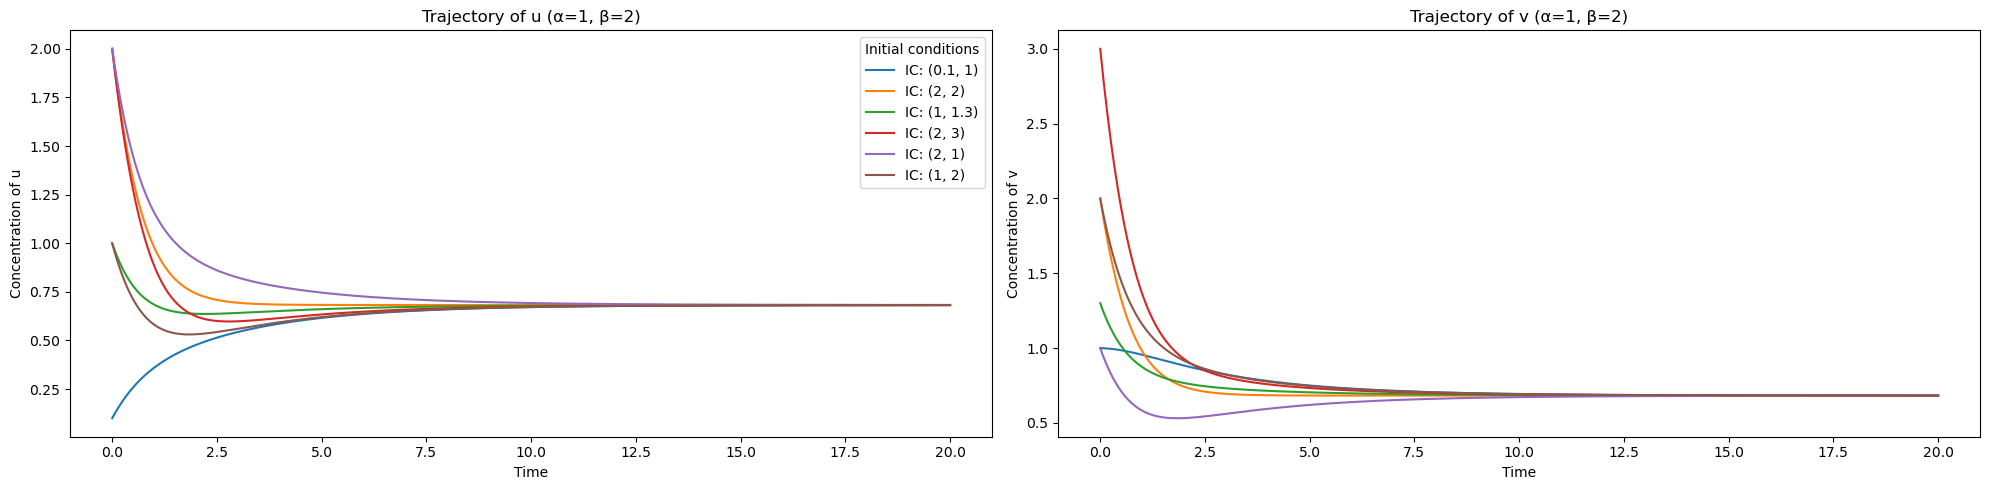

In [4]:
# Here is a list of interesting initial conditions to loop through:
initial_conditions = [(.1,1), (2,2),(1,1.3),(2,3),(2,1),(1,2)]

# time vector
time = np.linspace(0, 20, 1000)

# Preallocate array for trajectories
trajectory = np.zeros((len(initial_conditions), len(time), 2))

# Simulate for each initial condition
# write for loop with j so you have index for trajectory
for j, ic in enumerate(initial_conditions):
    trajectory[j] = scipy.integrate.odeint(cellular_switch_one, y0=ic, t=time)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

for j, ic in enumerate(initial_conditions):
    ax[0].set(xlabel='Time', ylabel='Concentration of u', title='Trajectory of u (α=1, β=2)')
    ax[1].set(xlabel='Time', ylabel='Concentration of v', title='Trajectory of v (α=1, β=2)')
    
    line = ax[0].plot(time, trajectory[j, :, 0], label=f"IC: {ic}")
    ax[1].plot(time, trajectory[j, :, 1], color=line[0].get_color())

ax[0].legend(title='Initial conditions')
plt.tight_layout()
plt.show()

### Plot a phase portrait

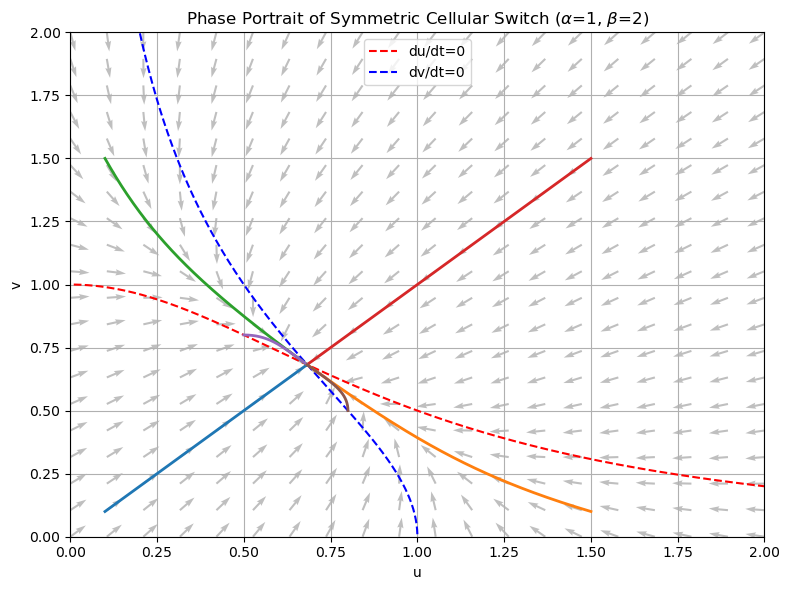

In [5]:
# Vector field
u = np.linspace(0, 2, 20)
v = np.linspace(0, 2, 20)
U, V = np.meshgrid(u, v) # creates 2D coordinate grid space
alpha, beta = 1, 2

dU = alpha / (1 + V**beta) - U
dV = alpha / (1 + U**beta) - V

# Normalize for display (all vectors will have length 1)
mag = np.sqrt(dU**2 + dV**2)
dU /= mag
dV /= mag

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))
# the alpha here is transparency, not the parameter in the system
ax.quiver(U, V, dU, dV, angles='xy', color='gray', alpha=0.5)

# Nullclines

# Nullcline plotter function (u-nullcline will be red dashed, v-nullcline will be blue dashed)
def plot_nullcline(ax, uspace, vspace, alpha, beta):
    ax.plot(uspace, alpha / (1 + uspace**beta), 'r--', label='du/dt=0')
    ax.plot(alpha / (1 + vspace**beta), vspace, 'b--', label='dv/dt=0')

uspace = np.linspace(0.01, 2, 500)
vspace = np.linspace(0.01, 2, 500)

# call plot_nullcline function
plot_nullcline(ax, uspace, vspace, alpha, beta)

# Trajectories for different initial conditions
t = np.linspace(0, 20, 1000)
initial_conditions = [
    [0.1, 0.1],
    [1.5, 0.1],
    [0.1, 1.5],
    [1.5, 1.5],
    [0.5, 0.8],
    [0.8, 0.5],
]

for ic in initial_conditions:
    sol = odeint(cellular_switch_one, ic, t)
    ax.plot(sol[:, 0], sol[:, 1], lw=2)

# Decorate
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xlabel('u')
ax.set_ylabel('v')
# the r makes strings raw so I can use LaTex math mode to write alpha, beta in greek
ax.set_title(r'Phase Portrait of Symmetric Cellular Switch ($\alpha$=1, $\beta$=2)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


### Compare
Notice that the equilibrium (where nullclines cross in the phase portrait) coincides with the values the blue and orange curve head towards when you plotted the solution with respect to $t$ above.

### Find equilibrium
We find equilibria by solving $\frac{du}{dt}=0$ and $\frac{dv}{dt}=0$ simultaneously. Some equations can be solved symbolically with tools in the Python library `sympy`, but some can't. This system can't be solved explicitly, but we can find the equilibrium numerically, calculate the Jacobian, evaluate the Jacobian at this equilibrium and then inspect the eigenvalues.  Recall that two real, negative eigenvalues for a system of two differential equations indicates the equilibrium is stable.

In [6]:
import sympy as sp
from scipy.optimize import fsolve # for numerical calculation of equilibrium

# Step 1: Define symbolic system for Jacobian
u, v = sp.symbols('u v', real=True)
alpha, beta = 1, 2

du_dt = alpha / (1 + v**beta) - u
dv_dt = alpha / (1 + u**beta) - v
f = sp.Matrix([du_dt, dv_dt])
vars = sp.Matrix([u, v])
J = f.jacobian(vars)

# Step 2: Define numerical RHS for root finding
def cellular_switch_rhs(y):
    u, v = y
    du = alpha / (1 + v**beta) - u
    dv = alpha / (1 + u**beta) - v
    return [du, dv]

# Step 3: Use fsolve to find numerical equilibrium
# have to strat with an initial guess
guess = [0.5, 0.5]
u_star, v_star = fsolve(cellular_switch_rhs, guess)
print("Numerical equilibrium found at: u =", u_star, ", v =", v_star)

# Step 4: Evaluate Jacobian numerically at the equilibrium
J_numeric = J.subs({u: u_star, v: v_star}).evalf()
print("\nJacobian at equilibrium:")
sp.pprint(J_numeric)

# Step 5: Compute eigenvalues
eigvals = J_numeric.eigenvals()
print("\nEigenvalues:")
sp.pprint(eigvals)

Numerical equilibrium found at: u = 0.6823278038280194 , v = 0.6823278038280194

Jacobian at equilibrium:
⎡       -1.0         -0.635344392343961⎤
⎢                                      ⎥
⎣-0.635344392343961         -1.0       ⎦

Eigenvalues:
{-1.63534439234396: 1, -0.364655607656039: 1}


### Compute the Jacobian Symbolically
Python has a package called Sympy (for "symbolic python") which lets us see the Jacobian in its general form (before being evaluated at an equilibrium).

In [7]:
import sympy as sp

# Define symbolic variables
u, v, alpha, beta = sp.symbols('u v alpha beta')

# Define the right-hand side of the system
du_dt = alpha / (1 + v**beta) - u
dv_dt = alpha / (1 + u**beta) - v

# Define the vector of equations
f = sp.Matrix([du_dt, dv_dt])

# Define the vector of state variables
y = sp.Matrix([u, v])

# Compute the Jacobian: df/dy
J = f.jacobian(y)

# Display the Jacobian matrix
sp.pprint(J)

⎡                     β  ⎤
⎢               -α⋅β⋅v   ⎥
⎢    -1       ───────────⎥
⎢                       2⎥
⎢               ⎛ β    ⎞ ⎥
⎢             v⋅⎝v  + 1⎠ ⎥
⎢                        ⎥
⎢        β               ⎥
⎢  -α⋅β⋅u                ⎥
⎢───────────      -1     ⎥
⎢          2             ⎥
⎢  ⎛ β    ⎞              ⎥
⎣u⋅⎝u  + 1⎠              ⎦


### Explore other parameter sets
We can use plotting to play around with other values for parameters and see how the phase portrait and solutions change.  Let's hold $\alpha=1$ and change $\beta$ to $\beta=10$.

### Numerically solve this system for a different paramter set and one initial condition
First, we will solve the system for fixed $\alpha=1$, $\beta=10$ and the different initial conditions given above. (We will try the initial condtions $(.1,1)$, $(2,2)$, $(1,1.3)$, $(2,3)$, $(2,1)$, $(1,2)$.)  We will plot the solution (a function $u(t)$ and a function $v(t)$) each on their own set of axes.

In [8]:
def cellular_switch_two(y,t):
    """ODE system modeling Gardner's bistable cellular switch with alpha = 1, beta = 2
    Args:
    y (array): (concentration of u, concentration of v)
    t (float): time
    Return: dy/dt"""
    alpha = 1
    beta = 10 # this is the change
    u, v = y 
    return np.array([(alpha/(1+v**beta)) - u ,
                     (alpha/(1+u**beta)) - v])

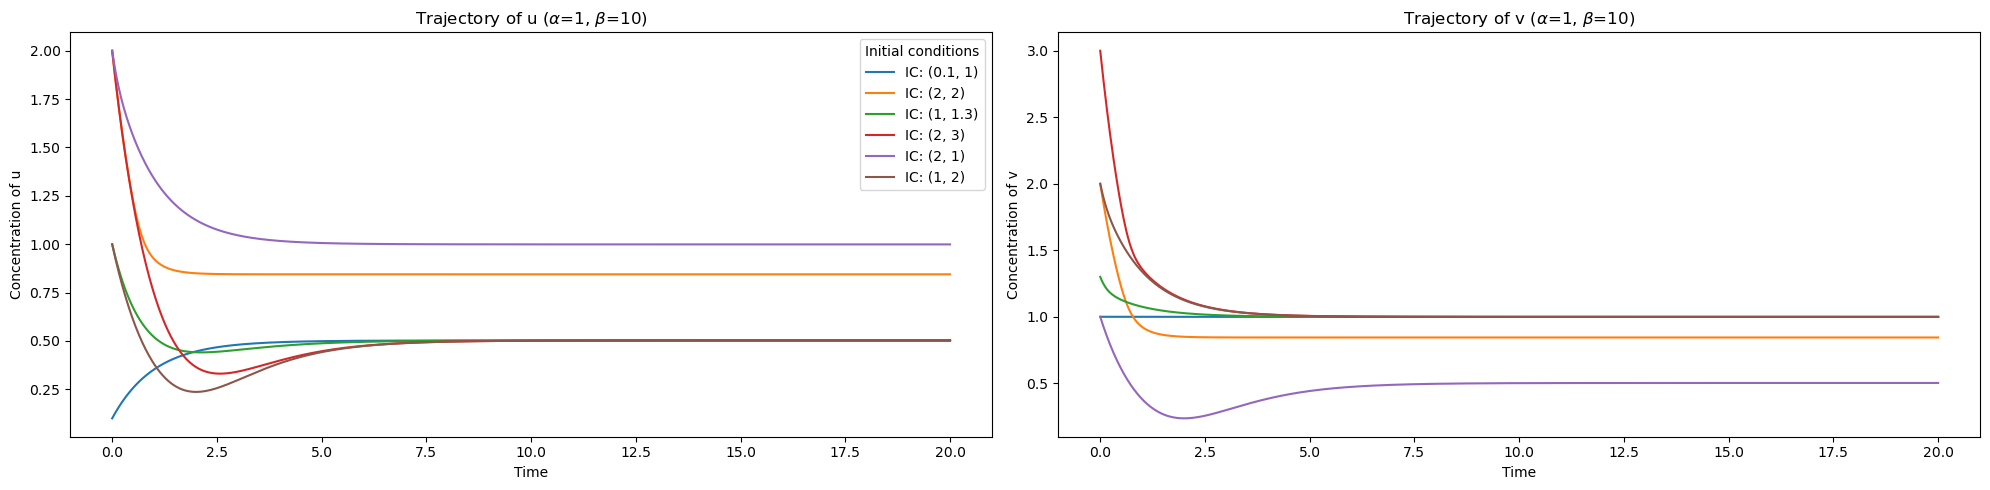

In [9]:
# Here is a list of interesting initial conditions to loop through:
initial_conditions = [(.1,1), (2,2),(1,1.3),(2,3),(2,1),(1,2)]

# time vector
time = np.linspace(0, 20, 1000)

# Preallocate array for trajectories
trajectory = np.zeros((len(initial_conditions), len(time), 2))

# Simulate for each initial condition
# write for loop with j so you have index for trajectory
for j, ic in enumerate(initial_conditions):
    trajectory[j] = scipy.integrate.odeint(cellular_switch_two, y0=ic, t=time) # call new function with beta = 10

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

for j, ic in enumerate(initial_conditions):
    ax[0].set(xlabel='Time', ylabel='Concentration of u', title=r'Trajectory of u ($\alpha$=1, $\beta$=10)')
    ax[1].set(xlabel='Time', ylabel='Concentration of v', title=r'Trajectory of v ($\alpha$=1, $\beta$=10)')
    
    line = ax[0].plot(time, trajectory[j, :, 0], label=f"IC: {ic}")
    ax[1].plot(time, trajectory[j, :, 1], color=line[0].get_color())

ax[0].legend(title='Initial conditions')
plt.tight_layout()
plt.show()

### Graph a phase portrait and nullclines

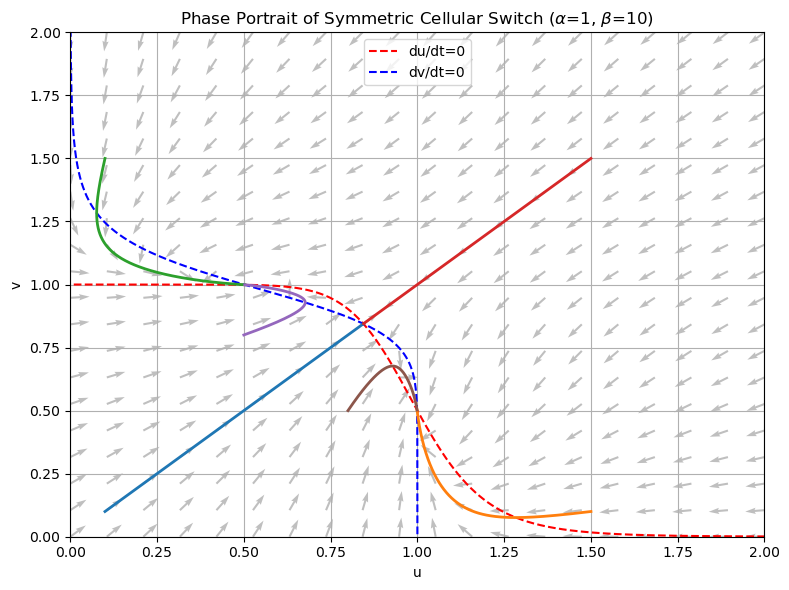

In [39]:
# Vector field
u = np.linspace(0, 2, 20)
v = np.linspace(0, 2, 20)
U, V = np.meshgrid(u, v) # creates 2D coordinate grid space
alpha, beta = 1, 10 # changed beta to 10

dU = alpha / (1 + V**beta) - U
dV = alpha / (1 + U**beta) - V

# Normalize for display (all vectors will have length 1)
mag = np.sqrt(dU**2 + dV**2)
dU /= mag
dV /= mag

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))
# the alpha here is transparency, not the parameter in the system
ax.quiver(U, V, dU, dV, angles='xy', color='gray', alpha=0.5)

# Nullclines

# Nullcline plotter function (u-nullcline will be red dashed, v-nullcline will be blue dashed)
def plot_nullcline(ax, uspace, vspace, alpha, beta):
    ax.plot(uspace, alpha / (1 + uspace**beta), 'r--', label='du/dt=0')
    ax.plot(alpha / (1 + vspace**beta), vspace, 'b--', label='dv/dt=0')

uspace = np.linspace(0.01, 2, 500)
vspace = np.linspace(0.01, 2, 500)

# call plot_nullcline function
plot_nullcline(ax, uspace, vspace, alpha, beta)

# Trajectories for different initial conditions
t = np.linspace(0, 20, 1000)
initial_conditions = [
    [0.1, 0.1],
    [1.5, 0.1],
    [0.1, 1.5],
    [1.5, 1.5],
    [0.5, 0.8],
    [0.8, 0.5],
]

for ic in initial_conditions:
    sol = odeint(cellular_switch_two, ic, t) # call the new function with the updated beta value
    ax.plot(sol[:, 0], sol[:, 1], lw=2)

# Decorate
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xlabel('u')
ax.set_ylabel('v')
# the r makes strings raw so I can use LaTex math mode to write alpha, beta in greek
ax.set_title(r'Phase Portrait of Symmetric Cellular Switch ($\alpha$=1, $\beta$=10)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


### Observe the number of equilibria from the nullclines
We see the nullclines intersect at three values.  So there are three equilibria. This case ($\beta$=10) is qualitatively different from the case where $\beta=2$ and indicates a bifurcation has occured as $\beta$ has increased.  We will first numerically solve for the equilibria and classify them using the eigenvalues of the Jacobian.  In the code below, I have the initial guess as $(.5,.5)$.  This will give one of the equilibria.  To find the others, edit the initial guess to something close to each of them (use the graph of the nullclines to make an informed guess).  From the output of the code below, one eigenvalue is positive and one is negative.  What type of equilibium does that predict?  Does that agree with your phase portrait and vector field?

In [10]:
import sympy as sp
from scipy.optimize import fsolve # for numerical calculation of equilibrium

# Step 1: Define symbolic system for Jacobian
u, v = sp.symbols('u v', real=True)
alpha, beta = 1, 10 # beta = 10 is the change

du_dt = alpha / (1 + v**beta) - u
dv_dt = alpha / (1 + u**beta) - v
f = sp.Matrix([du_dt, dv_dt])
vars = sp.Matrix([u, v])
J = f.jacobian(vars)

# Step 2: Define numerical RHS for root finding
def cellular_switch_rhs(y):
    u, v = y
    du = alpha / (1 + v**beta) - u
    dv = alpha / (1 + u**beta) - v
    return [du, dv]

# Step 3: Use fsolve to find numerical equilibrium
# have to strat with an initial guess
guess = [0.5, 0.5] # you will need to move this guess to find each of the equilibria
u_star, v_star = fsolve(cellular_switch_rhs, guess)
print("Numerical equilibrium found at: u =", u_star, ", v =", v_star)

# Step 4: Evaluate Jacobian numerically at the equilibrium
J_numeric = J.subs({u: u_star, v: v_star}).evalf()
print("\nJacobian at equilibrium:")
sp.pprint(J_numeric)

# Step 5: Compute eigenvalues
eigvals = J_numeric.eigenvals()
print("\nEigenvalues:")
sp.pprint(eigvals)

Numerical equilibrium found at: u = 0.8443975287920162 , v = 0.8443975287920173

Jacobian at equilibrium:
⎡      -1.0        -1.55602471207971⎤
⎢                                   ⎥
⎣-1.5560247120797        -1.0       ⎦

Eigenvalues:
{-2.5560247120797: 1, 0.556024712079703: 1}


### Bifurcation Diagram
We have noticed from exploration that changing $\beta$ changes the number of equilibria.   The code below will produce a bifuraction diagram. It uses a parameter sweep with brute-force root finding. We loop over many values of $\beta$ and for each one, try a grid of initial guesses.  Each guess is passed to `scipy.optimize.root` and any distinct equilibria get recorded.
This is a finicky process-- sometimes the process will miss a branch (if the grid doesn't cover their basin of attraction).  Changing the density of the initial guesses can help with this, but the trade off is computational time.
The diagram below does not indicate stability, but it would be possible to use the Jacobian for each $\beta$ value and color-code stability with that information.
Python provides methods to perform *numerical continuation*, which is a different way of drawing a bifurcation diagram computationally.  In this method, you take a known equilibria for some parameter values (say $\beta_0$), and then *continue* it by incrementally varying the parameter and using the previous solution as the initial guess for the next one.  There is a link in the references if you'd like to read  more about it. 

  0%|                                                   | 0/800 [00:00<?, ?it/s]/var/folders/xy/xym_q8_57pz2ff1dhfvmsdb80000gn/T/ipykernel_29562/2360111283.py:4: RuntimeWarning: invalid value encountered in scalar power
  du = (alpha / (1 + v**beta)) - u
/var/folders/xy/xym_q8_57pz2ff1dhfvmsdb80000gn/T/ipykernel_29562/2360111283.py:5: RuntimeWarning: invalid value encountered in scalar power
  dv = (alpha / (1 + u**beta)) - v
100%|█████████████████████████████████████████| 800/800 [01:01<00:00, 13.10it/s]


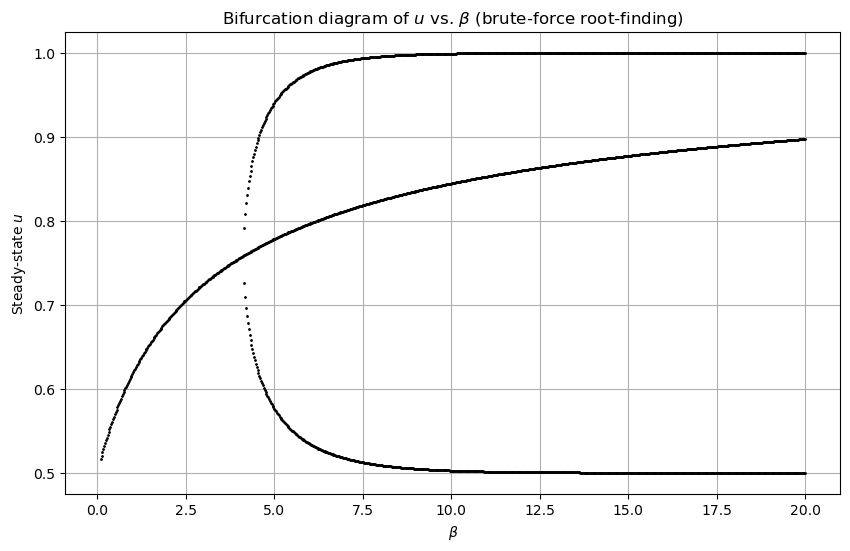

In [44]:
from scipy.optimize import root
from tqdm import tqdm # let's us display progress bar

# System: dy/dt = 0
def steady_state_equations(y, alpha, beta):
    u, v = y
    du = (alpha / (1 + v**beta)) - u
    dv = (alpha / (1 + u**beta)) - v
    return [du, dv]

# Parameters
alpha = 1
beta_vals = np.linspace(0.1, 20, 800)
u_steady = []
beta_record = []

# Define a grid of initial guesses
guess_vals = np.linspace(0.01, 3.5, 30)  # scan wider range
initial_guesses = [(u, v) for u in guess_vals for v in guess_vals]

# For uniqueness filtering
def is_new_solution(new_val, existing_vals, tol=1e-3):
    return all(np.linalg.norm(new_val - ev) > tol for ev in existing_vals)

# Loop over β values
for beta in tqdm(beta_vals):
    found_solutions = []
    for guess in initial_guesses:
        sol = root(steady_state_equations, guess, args=(alpha, beta), method='hybr')
        if sol.success:
            y_ss = sol.x
            if is_new_solution(y_ss, found_solutions):
                found_solutions.append(y_ss)
                beta_record.append(beta)
                u_steady.append(y_ss[0])  # or y_ss[1] for v
        # else: ignore bad root

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(beta_record, u_steady, 'k.', markersize=2)
plt.xlabel(r'$\beta$')
plt.ylabel('Steady-state $u$')
plt.title(r'Bifurcation diagram of $u$ vs. $\beta$ (brute-force root-finding)')
plt.grid(True)
plt.show()

In the bifurcation diagram above, find the two $\beta$ values we used to generate the phase portaits above and verify that the bifurcation diagram agrees with the phase portrait for each case (in terms of the number an dlocation of each equilibria, looking at the $u(t)$ component.

### Saving Figures
I generaly work in a notebook without saving figures for exploration, and when I have figures finalized, I save them by adding the line `plt.savefig("filename.extension")` above `plt.show()`.  This will put the figure in the same working directory as your notebook.  (For example, if I want to save the file for the phase portrait with $\beta$ = 10, I would add `plt.savefig("phase_portait_beta10.pdf")` to the cell that generates that figure.  You can change the file type to PNG, PDF, JPEG, etc. with the extension.  For Overleaf, I prefer the `.pdf` extension-- it prints and scales cleanly.  To put a figure in an Overleaf document, [read this.](https://www.overleaf.com/learn/latex/Inserting_Images)

### Susceptible Infected Recovered (SIR) Model
Recall the SIR Model for epidemics:

$$\frac{dS}{dt} = - \alpha S I$$

$$\frac{dI}{dt} = \alpha S I -\beta I$$

$$\frac{dR}{dt} = \beta I$$

If we assume the total population is constant $N$, then $S+I+R=N$ and we can eliminate the last equation in the model (if we can solve for $S$ and $I$, then we know what $R$ is).  You can read more about this model in our Math 313 textbook (Section 2.7).


### Tasks
1. Plot solutions ($S(t)$ and $I(t)$) for a variety of initial conditions with parameters $\alpha$=.2 and $\beta$=.1.
2. Plot a phase portrait and include nullclines.
3. Repeat, but for parameters $\alpha$=.2 and $\beta$=1. ($\beta$ increased by an order of magnitude).
4. Solve for the Jacobian symbolically.
5. Calculate the eigenvalues for each case and classify the equilibria.
6. Draw a bifurcation diagram with $\beta$ as the parameter and $I$ as the variable.
7. Export one figure and put it in an Overleaf document and generate a pdf to practice.

## References
- Gardner, Timothy S., Charles R. Cantor, and James J. Collins. "Construction of a genetic toggle switch in Escherichia coli." Nature 403.6767 (2000): 339-342.  [Article link.](https://www.nature.com/articles/35002131)
- Doulcier, Guilhem.  Collected Lecture Notes in Computational Biology.  [Tutorial link.](http://www.normalesup.org/~doulcier/teaching/index.html)
- [Natural parameter continuation methods.](https://en.wikipedia.org/wiki/Numerical_continuation#Natural_parameter_continuation)


## Other Resources Related to Python for ODEs and Beyond
- Rossant, Cyrille.  IPython Cookbook.  [Book link.](https://ipython-books.github.io)
- Sundes, Joakim.  Solving Ordinary Differential Equations with Python. [Book link.](https://sundnes.github.io/solving_odes_in_python/ode_book.pdf) 
